# Linear Regression I: Homework

### Question 1:

We have used the following code to generate different datasets with the same underlying properties but different noise ($\epsilon$). 

To change the noise but not the underlying function, we have set `NumPy`'s `random.seed` to a different value (e.g., 42, 100, 34, etc). 

Each different random seed generated a slightly different dataset for us. Using this approach each dataset is generated using the same underlying function (a quadratic). 

In practice, all datasets are generated using the same properties of the function, such as, the min and max `x` data, the same number of datapoints (20) and the same scale of noise (the noise will be different but the scale of the noise will be the same, set to 5 in the code below). 

In [1]:
import numpy as np

np.random.seed(42)
x = np.linspace(-5, 5, num=20)
y = 2*x**2 - x + 1 + np.random.normal(scale=5, size=len(x))

Your task is to use and modify that code above so as to generate 20 datasets with different noise characteristics, yet generated using the same underlying function. 

For each dataset:

* Fit it with line and compute SSE
* Fit it with parabola and compute SSE
* Fit it with 12th-order polynomial and computet the SSE
* For each type of model used to fit the datasets, make a plot of the mean and STD of the SSEs obtained across all datasets.
* Describe the result obtained also making sure to answer the following questions:
    * Which model fit has a smaller SSE on average?
    * Which model has a more variable SSE across repeats? Why?

Make sure you are approaching your coding using the best practices learned in class so far. Make proficient use of function definitions so as to limite repetitions in your code.

### Question 2

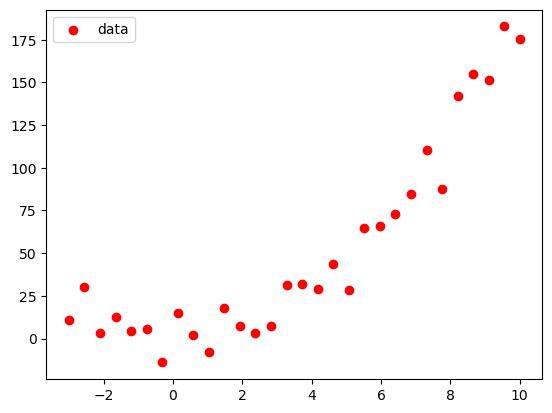

In [2]:
import matplotlib.pyplot as plt

np.random.seed(30)
x = np.linspace(-3, 10, num=30)
y = 2*x**2 - x + 1 + np.random.normal(scale=9, size=len(x))

plt.scatter(x,y, color='red', label = 'data')
plt.legend()
plt.show()

#### Q 2.1

Fit the dataset using a:
* second order polynomial (save the coefficients of this model in variable `q_coeffs`)
* third order polynomial (save the coefficients of this model in variable `t_coeffs`)
* Compute the SSE for each model and determine which model is better, motivate your choice with numbers, text and plots.

quadratic model SSE:  3428.0929175646256
cubic model SSE: 3426.6762604238806


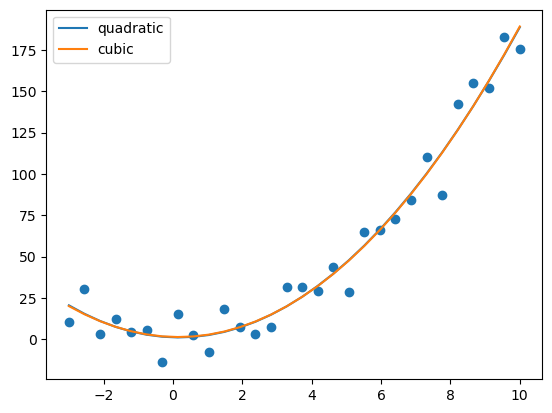

In [4]:
q_coeffs = np.polyfit(x, y, deg=2)
q_fit = np.polyval(q_coeffs, x)

t_coeffs = np.polyfit(x, y, deg=3)
t_fit = np.polyval(t_coeffs, x)

# compute SSE
def sse(y_hat, y):
    sse = sum( (y-y_hat)**2 )
    return sse

q_sse = sse(q_fit, y)
print("quadratic model SSE: ", q_sse)

t_sse = sse(t_fit, y)
print("cubic model SSE:", t_sse)

# which model is better 
plt.scatter(x,y)
plt.plot(x, q_fit, label='quadratic')
plt.plot(x, t_fit, label='cubic')
plt.legend()

#### Q 2.2

Let's now create a new x for us:

In [5]:
x_new = np.linspace(-10, 10, num=30)

Your task is to use `q_coeffs` and `t_coeffs` in combination to this new `x_new` values to evaluate the model outside of the original range of the data (Hint: You should cosinder using  `polyval` to implement this).

Note that above we are asking you to evaluate the original model fit within a certain range of x-values onto a new range of values. In a certain ways, we are asking you to use the models to make predictions of data outside of the original range of values. You are predicting data really **out there**!

Next, do the following:
* Plot the orginal x and the oriignal y (the orignal data) as black symbols.
* Using different colors, plot on top of the same figure, the models fit over the new range of values (the models used to make the prediction). [Just to make sure, this plot should have data plus two curves]
* Describe what you see:
    * do both model seem reasonably good at making the prediction?
    * which model seems better and why?
    * which model had a better SSE? 
    * is the result with the SSE consistent with what it appears here from the plot?
    * how do you interpret what it is going on here?
